# Face Recognition with Eigenfaces

Resources:

1. MIT OpenCourseWare Lecture Notes titled "Face Recognition Using Eigenfaces: <br />
https://ocw.mit.edu/courses/6-881-representation-and-modeling-for-image-analysis-spring-2005/resources/l02/



## Objective
* To recognize familiar faces in our dataset

## Basic Idea
Apply Principal Component Analysis (PCA) on face images.

PCA works by keeping the most important information from a feature and then ignore the rest (noise). In terms of Face Recognition, PCA looks for directions where face images vary the most as these are the principal components of the faces.

Conceptually, applying dimensional reduction technique on images, allows images of the same object to have high similarity in values relative to images of another object that looks completely different.

When we receive images such as face images and reduce its dimension, we can then take another image that we want to recognize, project it onto the face space and check for the residuals. If the residual is too high, it indicates a very low similarity, indicating that the image might not be even a face image. If the projection is close to one of the face image classes, we can safely assign it to that class. and if it's not, that it's probably a new face that doesn't exist in the dataset.

## Step-by-step in theory
1. Stack face images as vectors
2. Center the data
    * Compute average face
    * Subtract from every face
3. Find directions of maximum variance (to capture features of the face) which is done mathematically by:
    * Compute covariance matrix
    * Find eigen vectors (related to eigenvalues)
4. Keep only the most related components (dimensional reduction part)
5. Eigenfaces reconstruction

## Code Implementation

### Download and Save Dataset

In [1]:
import kagglehub
from pathlib import Path

data_dir = Path('../dataset/sample_dataset/train')

if data_dir.exists():
    print(f"Dataset already exist at: {data_dir}")
else:
    # Download latest version of vggface2
    path = kagglehub.dataset_download("hearfool/vggface2")

    print("Path to dataset files:", path)
    
    import os
    import shutil

    target_dir = "../dataset"

    # Make directory, leave unaltered if already exist
    os.makedirs(target_dir, exist_ok=True)
    
    shutil.move(path, target_dir)

Dataset already exist at: ../dataset/sample_dataset/train


/Users/reiner/Documents/GitHub/face_recognition_eigenfaces/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Sample_dataset decription:
* Class 1: n000430
    * Face Type: Asian
    * Gender: Female
    * Train path: '../sample_dataset/train/n000430'
    * Test path: '../sample_dataset/test/n000430'
    * Real name: 'Amy Tan'
    
* Class 2: n000458
    * Face Type: Western
    * Gender: Female
    * Train path: '../sample_dataset/train/n000458'
    * Test path: '../sample_dataset/test/n000458'

* Class 3: n000459
    * Face Type: Indian
    * Gender: Male
    * Train path: '../sample_dataset/train/n000459'
    * Test path: '../sample_dataset/test/n000459'

* Class 4: n000466
    * Face Type: Western
    * Gender: Male
    * Train path: '../sample_dataset/train/n000466'
    * Test path: '../sample_dataset/test/n000466'

### Preprocess Images

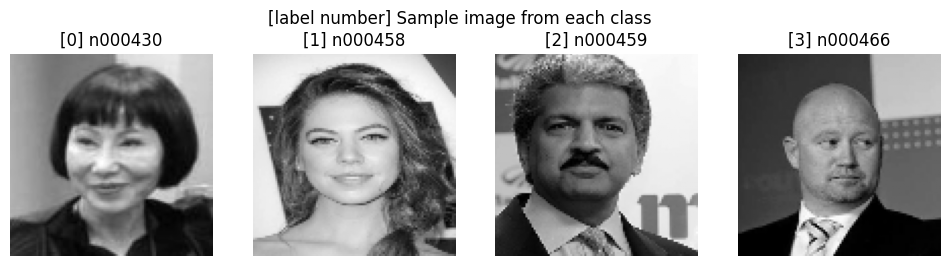

In [2]:
import matplotlib.pyplot as plt
import numpy as np

import cv2
import os
from pathlib import Path

# data_dir = Path('../dataset/sample_dataset/train')
data_dir = Path('../dataset/sample_dataset/train')
# data_dir = Path('../dataset/sample_dataset/train_cleaned_front')

class_folder_list = []
image_path_list = []
image_list = []
label_list = []

NUM_OF_CLASSES = 4
TARGET_WIDTH = 100
TARGET_HEIGHT = 100

label_mapping = {
    'n000430': 0,
    'n000458': 1,
    'n000459': 2,
    'n000466': 3,
    }

plt.figure(figsize=(NUM_OF_CLASSES * 3, 3))

# Get all folder in the dataset
for class_folder in sorted(os.listdir(data_dir)):
    
    # Skip other file
    if class_folder == ".DS_Store":
        continue
    
    ### Code to Skip specific class
    # if class_folder == "n000430":
    #     continue
    # if class_folder == "n000458":
    #     continue
    # if class_folder == "n000459":
    #     continue
    # if class_folder == "n000466":
    #     continue
    
    # Save folder name in class_folder_list
    class_folder_list.append(class_folder)

    for index, image_file in enumerate(sorted(os.listdir(data_dir / class_folder))):
        # print(image_file)
        
        image_path = data_dir / class_folder / image_file
        
        # Read as grayscale
        image = cv2.imread(str(image_path), cv2.IMREAD_GRAYSCALE)
        
        # Read ERROR HANDLING
        if image is None:
            print("FAILED TO READ:", image_path)
            continue
        
        # Save the list
        image_path_list.append(image_file)
        label_list.append(label_mapping[class_folder])
        
        # Image resize to 100x100
        image = cv2.resize(image, (TARGET_WIDTH, TARGET_HEIGHT))
        
        # Show the first train image from each label
        if index == 0:
            # print(f'PATH WITH INDEX 0 = {data_dir / class_folder / image_file}')
            
            # Show images as subplots
            plt.subplot(1, NUM_OF_CLASSES, len(class_folder_list))
            plt.imshow(image, cmap="gray")
            plt.title(f'[{label_mapping[class_folder]}] {class_folder}')
            plt.suptitle('[label number] Sample image from each class')
            plt.axis('off')
            
            # DEBUG PRINT
            # print(image.shape)
            # print(image.flatten().shape)
            # print(image.flatten())
            
        image_list.append(image.flatten())
        
plt.show()

image_list = np.array(image_list)

# DEBUG PRINT
# print(type(image_list))
# print(image_list.ndim)
# print(image_list.shape)
# print(image_list)
# print()
# print(image_list[:2])
        
# print(class_folder_list)
# print(image_path_list)
# print(label_list)
# print(len(image_path_list))
# print(len(label_list))

### Calculate Mean Faces

In [3]:
len(image_list)

1396

In [4]:
image_list.shape

(1396, 10000)

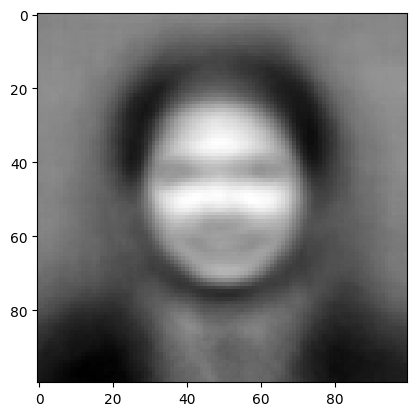

In [5]:
# mean_faces = []

# for pixel in np.arange(image_list.shape[1]):
#     mean_pixel = image_list[:, pixel].sum() / image_list.shape[0]
#     mean_faces.append(mean_pixel)
    
# mean_faces = np.array(mean_faces)

mean_faces = image_list.mean(axis=0)
    
mean_faces_reshaped = mean_faces.reshape(TARGET_HEIGHT,TARGET_WIDTH)
# print(mean_faces_reshaped)
plt.imshow(mean_faces_reshaped, cmap='gray')

# image_list.sum() / len(image_list)
# Compute the average of each pixel

The Mean Faces result looks bad because we cannot see the facial structure quite clearly. A good mean faces would have clarity on the face features like eyes area, nose, mouth, and ears. The cause of this issue is from the dataset, therefore we have to readjust the dataset as follows:
* Align face so that facial structures are at similar positions
* Rotate faces that are not straight
* Similar lighting


### Subtract the mean from each face

Face diff pixel  ranges from -133.03366762177652 - 94.61389684813754
After normalized ranges from 0.0 - 1.0


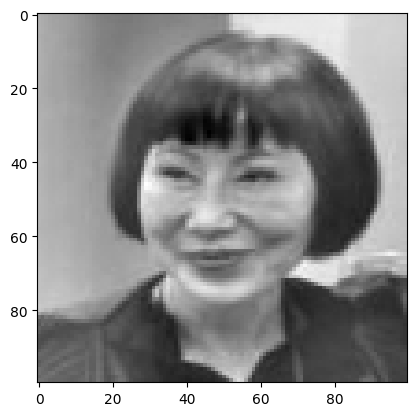

In [6]:
face_diff = image_list - mean_faces
face_diff_reshaped = face_diff[0].reshape(TARGET_HEIGHT,TARGET_WIDTH)

print(f'Face diff pixel  ranges from {face_diff_reshaped.min()} - {face_diff_reshaped.max()}')

# Normalize pixel difference for visualization
face_diff_normalized = (face_diff_reshaped - face_diff_reshaped.min()) / (face_diff_reshaped.max() - face_diff_reshaped.min())

print(f'After normalized ranges from {face_diff_normalized.min()} - {face_diff_normalized.max()}')

plt.imshow(face_diff_normalized, cmap='gray')

### Calculate Covariance Matrix


In [7]:
face_diff

array([[  21.42765043,   19.00358166,   15.68553009, ...,  -75.19126074,
         -75.41977077,  -74.61318052],
       [  91.42765043,   91.00358166,   91.68553009, ...,  -65.19126074,
         -65.41977077,  -61.61318052],
       [-103.57234957, -104.99641834, -105.31446991, ...,  -63.19126074,
         -63.41977077,  -63.61318052],
       ...,
       [   0.42765043,    1.00358166,    1.68553009, ...,  -80.19126074,
         -80.41977077,  -82.61318052],
       [ -22.57234957,  -20.99641834,  -24.31446991, ...,  -67.19126074,
         -60.41977077,  -49.61318052],
       [  99.42765043,   99.00358166,   98.68553009, ...,  -84.19126074,
         -84.41977077,  -84.61318052]], shape=(1396, 10000))

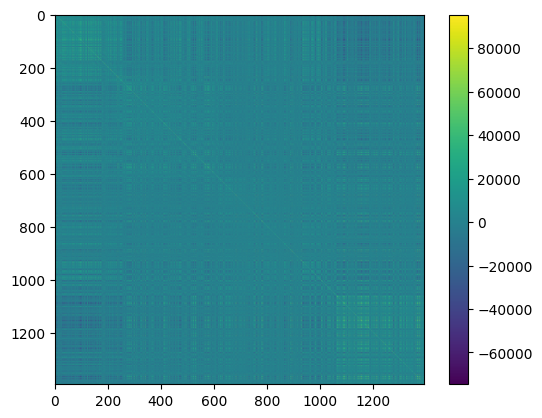

In [8]:
cov_matrix = (face_diff @ face_diff.T) / (face_diff.shape[0] - 1)

plt.imshow(cov_matrix)
plt.colorbar()

### Calculate eigenvalues and eigenvectors with Decomposition of Covariance

In [9]:
eigenvalues_eigh, eigenvectors_eigh = np.linalg.eigh(cov_matrix)

# sort descending
idx = np.argsort(eigenvalues_eigh)[::-1]
eigenvalues_eigh = eigenvalues_eigh[idx]
eigenvectors_eigh = eigenvectors_eigh[:, idx]

# compute eigenfaces
eigenfaces_eigh = face_diff.T @ eigenvectors_eigh

# normalize
eigenfaces_eigh = eigenfaces_eigh / np.linalg.norm(eigenfaces_eigh, axis=0)

### Visualize the eigenface

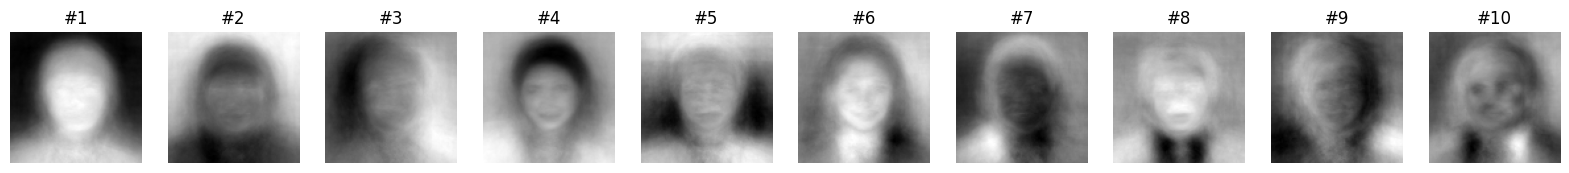

In [10]:
n = 10

plt.figure(figsize=(2*n, 3))

for index in range(n):
    eigenfaces_sample_reshaped = eigenfaces_eigh[:,index].reshape(TARGET_HEIGHT,TARGET_WIDTH)

    # print(f'eigenfaces sample pixel ranges from {eigenfaces_sample_reshaped.min()} - {eigenfaces_sample_reshaped.max()}')

    # Normalize pixel difference for visualization
    eigenfaces_sample_normalized = (eigenfaces_sample_reshaped - eigenfaces_sample_reshaped.min()) / (eigenfaces_sample_reshaped.max() - eigenfaces_sample_reshaped.min())

    # print(f'eigenfaces sample pixel ranges from {eigenfaces_sample_normalized.min()} - {eigenfaces_sample_normalized.max()}')

    plt.subplot(1, n, index+1)
    plt.imshow(eigenfaces_sample_normalized, cmap='gray')
    plt.title(f'#{index+1}')
    plt.axis('off')

### Eigenvalues and Eigenfaces Calculation with SVD

In [11]:
U, S, Vt = np.linalg.svd(face_diff, full_matrices=False)
eigenfaces_svd = Vt.T
eigenvalues_svd = S**2 / (face_diff.shape[0] - 1)

In [12]:
eigenvalues_svd.shape
print(eigenvalues_svd[:5])
print(eigenvalues_svd[-5:])

# Notice that the eigenvalues_scd result is automatically sorted

[16398569.09593539  3674764.9029812   2785946.74505987  2712147.97488427
  1492050.15259192]
[1.63291289e+02 1.13797228e+02 8.74633874e+01 2.49921640e+01
 2.38898295e-25]


### Visualization for SVD Result

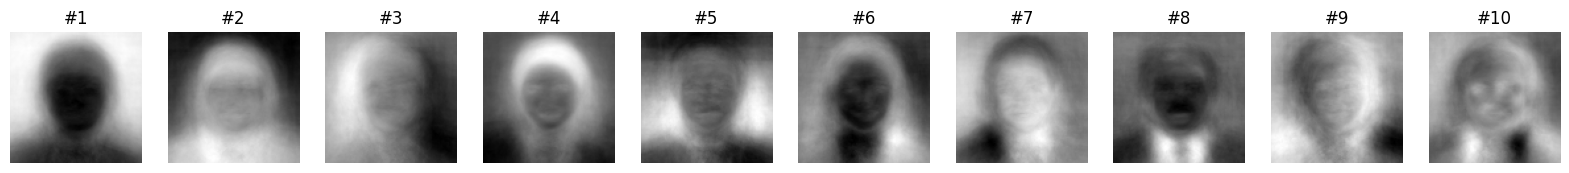

In [13]:
n = 10

plt.figure(figsize=(2*n, 3))

for index in range(n):
    eigenfaces_sample_reshaped = eigenfaces_svd[:,index].reshape(TARGET_HEIGHT,TARGET_WIDTH)

    # print(f'eigenfaces sample pixel ranges from {eigenfaces_sample_reshaped.min()} - {eigenfaces_sample_reshaped.max()}')

    # Normalize pixel difference for visualization
    eigenfaces_sample_normalized = (eigenfaces_sample_reshaped - eigenfaces_sample_reshaped.min()) / (eigenfaces_sample_reshaped.max() - eigenfaces_sample_reshaped.min())

    # print(f'eigenfaces sample pixel ranges from {eigenfaces_sample_normalized.min()} - {eigenfaces_sample_normalized.max()}')


    plt.subplot(1, n, index+1)
    plt.imshow(eigenfaces_sample_normalized, cmap='gray')
    plt.title(f'#{index+1}')
    plt.axis('off')

### Check Eig and SVD both result are identical

In [14]:
np.allclose(
    np.abs(eigenfaces_eigh[:, 0]),
    np.abs(eigenfaces_svd[:, 0]),
    atol=1e-5
)

# If true, our Eigenfaces calculating with 'eigh' and 'svd' are identical.

True

### Choose top-K eigenfaces (part of dimensional reduction)

In [15]:
### Option 1 - Fixed K
# K = 50

### Option 2 - Decide K by the amount of information collected from the meanfaces image
# Normalize the SVD result to convert the eigenfaces information into percentage
explained_variance = eigenvalues_svd / np.sum(eigenvalues_svd)
cumulative_variance = np.cumsum(explained_variance)

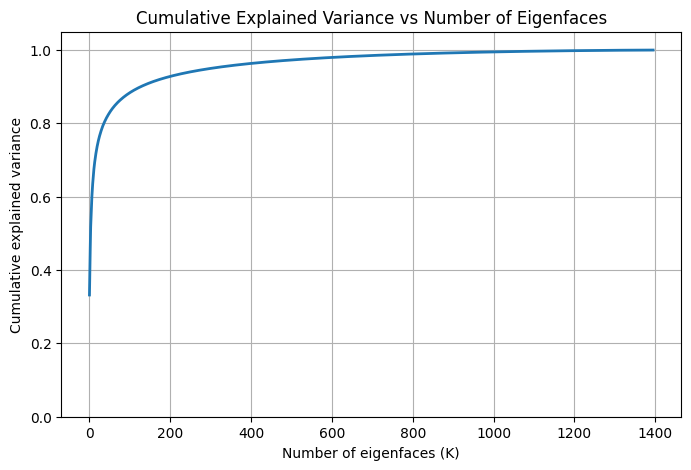

In [16]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 5))

plt.plot(cumulative_variance, linewidth=2)
plt.xlabel("Number of eigenfaces (K)")
plt.ylabel("Cumulative explained variance")
plt.title("Cumulative Explained Variance vs Number of Eigenfaces")

plt.ylim(0, 1.05)
plt.grid(True)

plt.show()


The cumulative graph shows how much information of the face is kept by taking more and more eigenfaces.

In [17]:
K = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Keep {K} eigenfaces (index 0 -> {K-1})")


Keep 302 eigenfaces (index 0 -> 301)


In [18]:
# Print the cumulative result to make sure
print(f'index {K-2}: {cumulative_variance[K-2]}')
print(f'index {K-1}: {cumulative_variance[K-1]}')
print(f'index {K}: {cumulative_variance[K]}')

# index K is where we just passed the 95% threshold

index 300: 0.9499743824603077
index 301: 0.950139741158316
index 302: 0.9503046950041018


In [19]:
# Keep the eigenfaces produced by SVD until index K
eigenfaces = eigenfaces_svd[:, :K]

### Project faces into this space (to train the embeddings)

In [20]:
train_projections = face_diff @ eigenfaces
train_projections

array([[-6.79534485e+02, -3.09613880e+03,  1.04268087e+03, ...,
        -5.04334067e+01,  2.85558376e+01,  9.22006361e+00],
       [ 2.60165430e+03, -4.90378709e+03, -2.21914896e+03, ...,
        -2.73970462e+01, -7.99096731e+01, -1.25846031e+01],
       [-6.77951783e+03, -8.89926958e+02,  5.40336069e+02, ...,
        -2.62443179e+00, -1.03917186e+02, -3.55727066e+01],
       ...,
       [-3.24939795e+02, -1.41940054e+03,  1.39658280e+03, ...,
         9.59118803e+01, -2.88875278e+02, -3.30638008e+01],
       [-1.04242750e+03, -1.22033708e+03,  2.19272506e+03, ...,
         4.64512163e+01, -2.43501455e+00,  2.69119883e+01],
       [ 3.43193899e+03, -3.87033333e+03,  2.21712455e+03, ...,
        -6.41768519e+01, -1.01787119e+02,  2.90408670e+00]],
      shape=(1396, 302))

In [21]:
label_list = np.array(label_list)

### Face Recognition Logic with Eigenfaces

I want the input to be 1 image and the pipeline will then return the corresponding label, which is in this case, the name of the folder.

When we receive the input image, this is what we're gonna do:
1. Preprocess the input image the same exact way
2. Subtract the mean face
3. Project it into the eigenface space
4. Compute the distance to all training projections with nearest neighbour
5. Pick the smallest distance

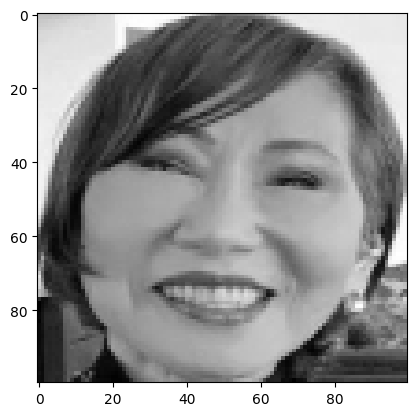

distances: [ 7637.77927     8464.26308736 10461.00239325 ...  8480.91858368
  9019.99179652  9509.29965857]
min_index: 963

W/O threshold:
Predicted label: 2
Distance: 5656.794955461088

With threshold: None
Recognized as: 2


In [22]:
from utils.utils import (
    preprocess_face,
    project_face,
    compute_min_distance,
    predict_face,
    predict_face_with_centroids,
    recognize_face_centroid,
    recognize_face_centroid,
    compute_distances_to_centroids,
    predict_batch_label_display,
    predict_batch_detailed_label_display
    )

test_image_path = Path("input_images/amy_new.jpg")

predict_face(
    test_image_path,
    mean_faces,
    eigenfaces,
    train_projections,
    label_list,
    TARGET_WIDTH,
    TARGET_HEIGHT,
    threshold=None,
    display_plot=True
    )


# test_face = preprocess_face(test_image_path, TARGET_WIDTH=TARGET_WIDTH, TARGET_HEIGHT=TARGET_HEIGHT, display_plot=True)
# test_projection = project_face(test_face, mean_faces, eigenfaces)

# predicted_label, distance = compute_min_distance(
#     test_projection,
#     train_projections,
#     label_list
# )


# print("Predicted label:", predicted_label)
# print("Distance:", distance)


In [23]:
image_path_list[963]

'0345_03.jpg'

In [24]:
# THRESHOLD = 5000  # tune this

# if distance > THRESHOLD:
#     print("Unknown face")
# else:
#     print("Recognized as:", predicted_label)


### Using class centroid

By definition, class centroid is the average eigenface representation of one class that represents one identity. For this reason, class centroid is calculated independently for each class, we will compute a centroid which is the average of all their training projections.

In [25]:
class_centroids = {}

for label in np.unique(label_list):
    class_centroids[label] = train_projections[label_list == label].mean(axis=0)

class_centroids

{np.int64(0): array([-2.36043025e+03, -1.28462958e+03, -2.09571280e+02, -7.52365656e+02,
        -2.76664555e+00, -2.83154786e+02, -5.57434936e+01, -3.69098182e+02,
         8.64563673e+01,  2.32028720e+02,  5.20775829e+02, -6.66432835e+01,
         2.10343702e+02, -2.26327447e+02, -8.33347588e+00,  3.94519279e+02,
         2.12823325e+02,  1.57618965e+02,  8.48653966e+00, -9.13141472e+01,
         2.99205730e+01,  1.09501315e+02,  3.79648579e+01, -2.95741136e+01,
        -1.90360108e+02,  5.69415180e+01,  5.88360697e+00, -2.22186629e+01,
        -6.41432913e+01, -5.29734121e+01, -7.18658229e+01,  4.18549448e+01,
        -3.31675206e+01, -1.78378784e+01, -9.59738034e+00,  9.80849517e+00,
        -3.08776695e+01, -2.48418701e+01, -5.30094048e+00, -7.66324123e+00,
        -3.43278927e+01,  1.56086479e+01, -1.97386386e+01, -5.42093860e+00,
        -5.19320676e+01,  4.64198524e+00,  2.82797164e+01,  5.92562293e+01,
         7.44075216e+01, -3.60852700e+01, -8.81610451e-01,  3.88424635e+01,

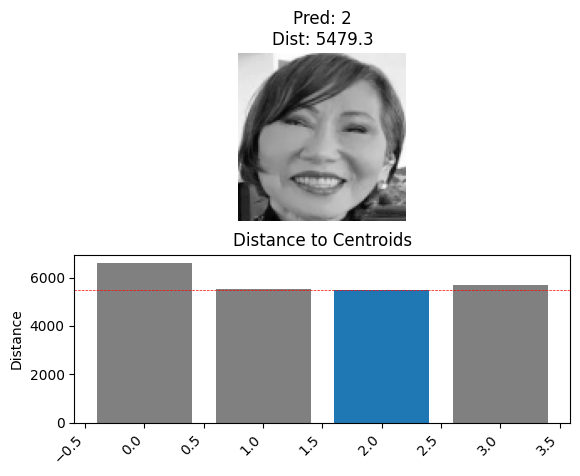

In [26]:
predict_face_with_centroids(
    test_image_path,
    mean_faces,
    eigenfaces,
    # train_projections,
    # label_list,
    class_centroids,
    TARGET_WIDTH,
    TARGET_HEIGHT,
    threshold=5500,
    display_plot=False
)

### Batch Prediction

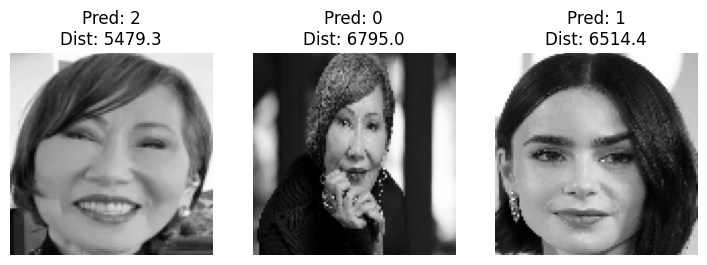

In [27]:
test_image_list = ['amy_new.jpg', 'amy_tan_full_image.jpg', 'curly_bob.jpg']

from utils.utils import predict_batch_label_display

predict_batch_label_display(
    test_image_list,
    mean_faces,
    eigenfaces,
    class_centroids,
    TARGET_WIDTH,
    TARGET_HEIGHT,
)


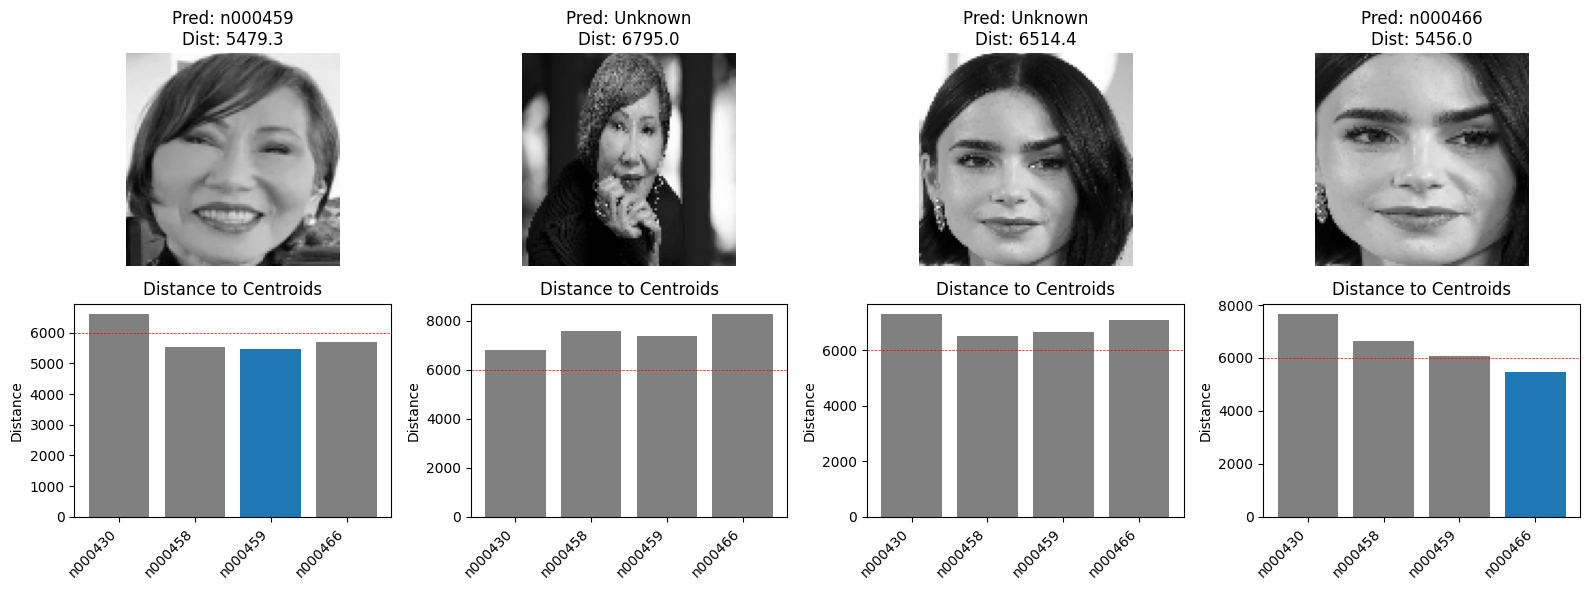

In [30]:
test_image_list = ['amy_new.jpg', 'amy_tan_full_image.jpg', 'curly_bob.jpg', 'curly_bob_zoomed.jpg']

from utils.utils import predict_batch_detailed_label_display

predict_batch_detailed_label_display(
    test_image_list,
    mean_faces,
    eigenfaces,
    class_centroids,
    TARGET_WIDTH,
    TARGET_HEIGHT,
    label_mapping=label_mapping,
    threshold=6000
)
